In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary=pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary.shape

(30, 2)

In [4]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

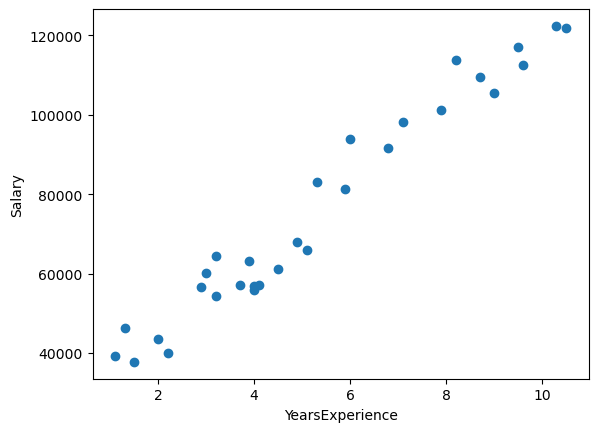

In [7]:
plt.scatter(salary['YearsExperience'],salary['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

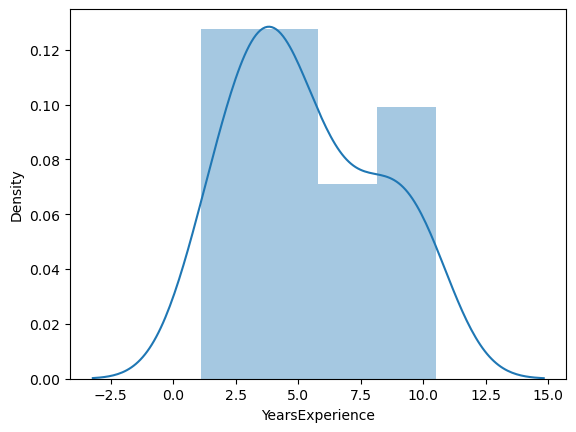

In [8]:
sns.distplot(salary['YearsExperience'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

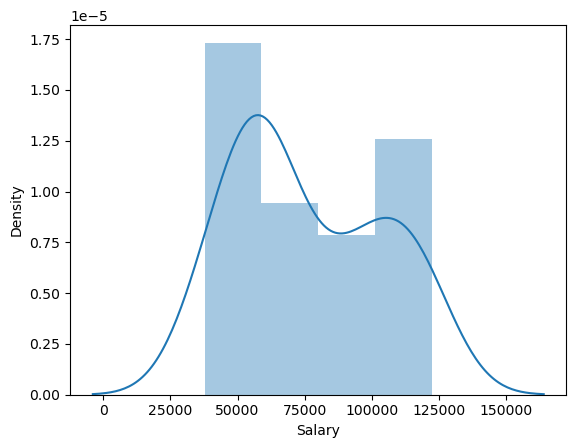

In [9]:
sns.distplot(salary['Salary'])

In [10]:
salary.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14ba487be80>,
 'caps': [<matplotlib.lines.Line2D at 0x14ba488e460>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ba487bbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x14ba488ea00>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ba488ecd0>],
 'means': []}

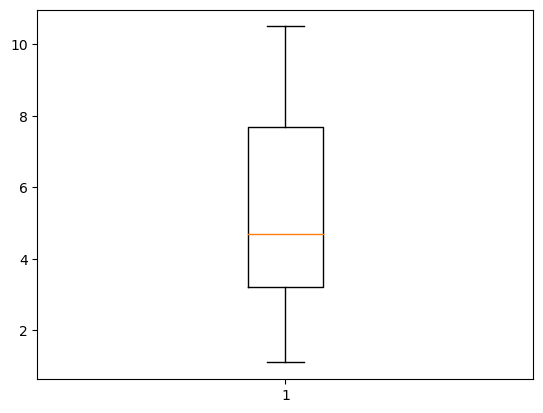

In [11]:
plt.boxplot(salary['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14ba47769a0>,
 'caps': [<matplotlib.lines.Line2D at 0x14ba4776f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ba47766d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14ba4785520>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ba47857f0>],
 'means': []}

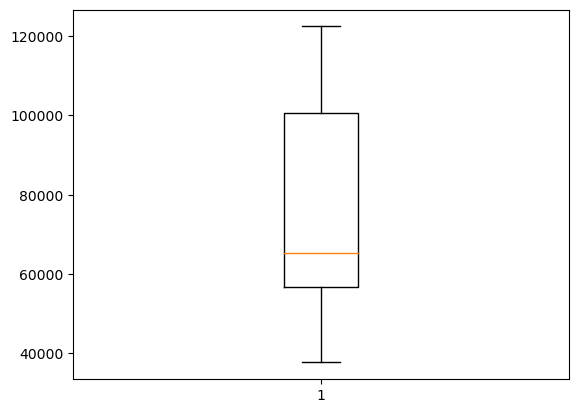

In [12]:
plt.boxplot(salary['Salary'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [14]:
x_train,x_test,y_train,y_test=train_test_split(salary[['YearsExperience']],salary[['Salary']],test_size=0.2,random_state=42)

In [15]:
x_train.shape,x_test.shape

((24, 1), (6, 1))

In [16]:
sd = StandardScaler()

In [17]:
x_train =sd.fit_transform(x_train)
x_test = sd.transform(x_test)

In [18]:
x_train

array([[ 1.77445774],
       [ 1.21912622],
       [-0.41216011],
       [-1.41869849],
       [-1.03690807],
       [-0.03036969],
       [-0.79395053],
       [-0.37745189],
       [-0.41216011],
       [ 0.94146047],
       [-1.34928205],
       [-1.27986561],
       [ 1.32325088],
       [-1.10632451],
       [ 0.66379471],
       [ 1.49679198],
       [ 0.24729607],
       [ 1.84387418],
       [ 0.55967005],
       [-0.68982587],
       [-0.44686833],
       [-0.23861901],
       [ 0.28200429],
       [-0.75924231]])

In [19]:
lr=LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(x_test)
y_pred

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [22]:
r2=r2_score(y_test,y_pred)
print('R-squared :',r2)

rmse =np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE:',rmse)

R-squared : 0.9024461774180498
RMSE: 7059.043621901506
